# Automating Port Operations
Marina Pier Inc. is leveraging technology to automate their operations on the San Francisco port.
The company’s management has set out to build a bias-free/ corruption-free automatic system that reports & avoids faulty situations caused by human error. Examples of human error include misclassifying the correct type of boat. The type of boat that enters the port region is as follows:
- Buoy
- Cruise_ship
- Ferry_boat
- Freight_boar
- Gondola
- Inflatable_boat
- Kayak
- Paper_boat
- Sailboat

Marina Pier wants to use Deep Learning techniques to build an automatic reporting system that recognizes the boat. The company is also looking to use a transfer learning approach of any lightweight pre-trained model in order to deploy in mobile devices.

Perform the following steps:<br>
1. Build a CNN network to classify the boat.
    1. Split the dataset into train and test in the ratio 80:20, with shuffle and random state=43. 
    2. Use tf.keras.preprocessing.image_dataset_from_directory to load the train and test datasets. This function also supports data normalization.
(Hint: image_scale=1./255).
    3. Load train, validation and test dataset in batches of 32 using the function initialized in the above step. 
    4. Build a CNN network using Keras with the following layers
       - Cov2D with 32 filters, kernel size 3,3, and activation relu, followed by MaxPool2D
       - Cov2D with 32 filters, kernel size 3,3, and activation relu, followed by MaxPool2D
       - GlobalAveragePooling2D layer
       - Dense layer with 128 neurons and activation relu
       - Dense layer with 128 neurons and activation relu
       - Dense layer with 9 neurons and activation softmax.
    5. Compile the model with Adam optimizer, categorical_crossentropy loss, and with metrics accuracy, precision, and recall.
    6. Train the model for 20 epochs and plot training loss and accuracy against epochs.
    7. Evaluate the model on test images and print the test loss and accuracy.
    8. Plot heatmap of the confusion matrix and print classification report.
    <br><br>
2. Build a lightweight model with the aim of deploying the solution on a mobile device using transfer learning. You can use any lightweight pre-trained model as the initial (first) layer. MobileNetV2 is a popular lightweight pre-trained model built using Keras API. 
    1. Split the dataset into train and test datasets in the ration 70:30, with shuffle and random state=1.
    2. Use tf.keras.preprocessing.image_dataset_from_directory to load the train and test datasets. This function also supports data normalization.
(Hint: Image_scale=1./255).
    3. Load train, validation and test datasets in batches of 32 using the function initialized in the above step.
    4. Build a CNN network using Keras with the following layers. 
       - Load MobileNetV2 - Light Model as the first layer (Hint: Keras API Doc)
       - GLobalAveragePooling2D layer
       - Dropout(0.2)
       - Dense layer with 256 neurons and activation relu
       - BatchNormalization layer
       - Dropout(0.1)
       - Dense layer with 128 neurons and activation relu
       - BatchNormalization layer
       - Dropout(0.1)
       - Dense layer with 9 neurons and activation softmax
    5. Compile the model with Adam optimizer, categorical_crossentropy loss, and metrics accuracy, Precision, and Recall.
    6. Train the model for 50 epochs and Early stopping while monitoring validation loss.
    7. Evaluate the model on test images and print the test loss and accuracy.
    8. Plot Train loss Vs Validation loss and Train accuracy Vs Validation accuracy.
    <br><br>
3. Compare the results of both models built in steps 1 and 2 and state your observations.

### Import modules

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import PIL
import os

from PIL import Image
from tensorflow import keras
from tensorflow import data as tf_data
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from sklearn.metrics import confusion_matrix, classification_report
from keras.metrics import Precision, Recall

In [2]:
# Setup variables
notebook_dir = os.getcwd()
image_dir = os.path.join(notebook_dir, 'Automating_Port_Operations_dataset')

batch_size = 32
img_height = 256
img_width = 256

### Base CNN Model

In [3]:
# Load the image dataset and split data into 80:20 split, using seed = 43 and shuffle enabled with batch size of 32 

# training set, images rescaled to 256x256 by default
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    image_dir,
    validation_split=0.2,
    subset="training",
    seed=43,
    shuffle=True,
    batch_size=32,
    image_size=(img_width,img_height)
)

#validation set, images rescaled to 256x256 by default
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    image_dir,
    validation_split=0.2,
    subset="validation",
    seed=43,
    shuffle=True,
    batch_size=32,
    image_size=(img_width,img_height)
)


Found 1162 files belonging to 9 classes.
Using 930 files for training.
Found 1162 files belonging to 9 classes.
Using 232 files for validation.


['buoy', 'cruise_ship', 'ferry_boat', 'freight_boat', 'gondola', 'inflatable_boat', 'kayak', 'paper_boat', 'sailboat']


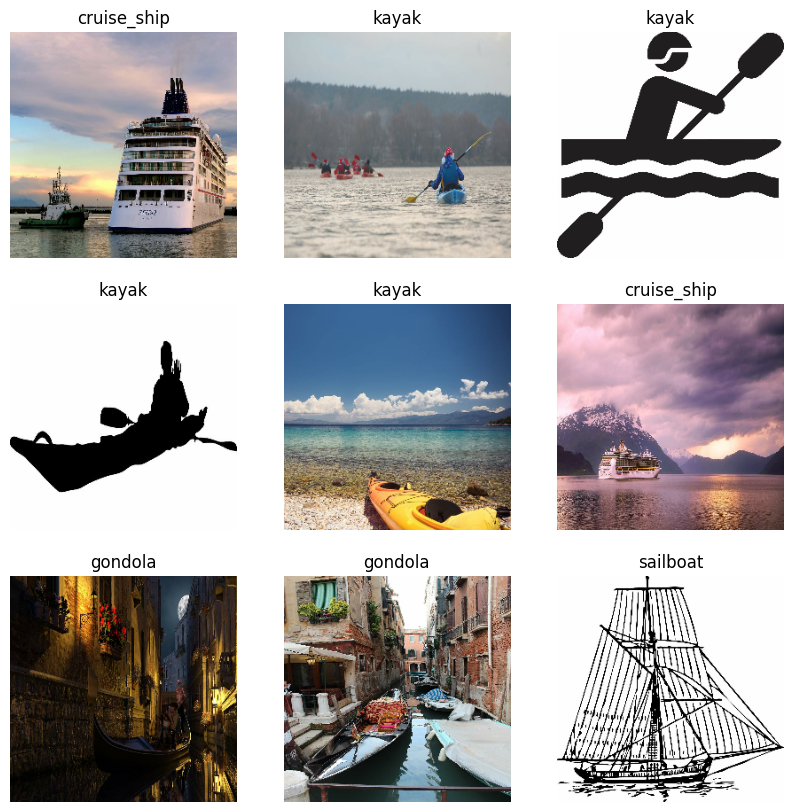

In [4]:
class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [5]:
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf_data.AUTOTUNE)
val_ds = val_ds.prefetch(tf_data.AUTOTUNE)

In [6]:
# Build & compile Sequential CNN 
cnn_model = Sequential([
    keras.Input(shape=(img_height, img_width, 3)),
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation='softmax')
])

cnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 global_average_pooling2d (  (None, 32)                0

In [7]:
# Train model
epochs = 20
train_history = cnn_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
30/30 [==============================] - 13s 406ms/step - loss: 1.9393 - accuracy: 0.3473 - val_loss: 1.8158 - val_accuracy: 0.3017
Epoch 2/20
30/30 [==============================] - 12s 404ms/step - loss: 1.8192 - accuracy: 0.3430 - val_loss: 1.8078 - val_accuracy: 0.3017
Epoch 3/20
30/30 [==============================] - 12s 407ms/step - loss: 1.7993 - accuracy: 0.3430 - val_loss: 1.7903 - val_accuracy: 0.3017
Epoch 4/20
30/30 [==============================] - 12s 405ms/step - loss: 1.7786 - accuracy: 0.3430 - val_loss: 1.7732 - val_accuracy: 0.3017
Epoch 5/20
30/30 [==============================] - 12s 404ms/step - loss: 1.7556 - accuracy: 0.3505 - val_loss: 1.7762 - val_accuracy: 0.2845
Epoch 6/20
30/30 [==============================] - 12s 407ms/step - loss: 1.7322 - accuracy: 0.3667 - val_loss: 1.7646 - val_accuracy: 0.2888
Epoch 7/20
30/30 [==============================] - 12s 408ms/step - loss: 1.7302 - accuracy: 0.3634 - val_loss: 1.7493 - val_accuracy: 0.2888

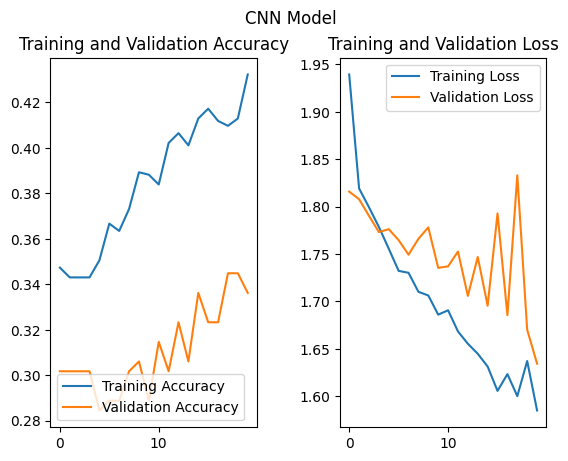

In [8]:
# Plot model training results
acc = train_history.history['accuracy']
val_acc = train_history.history['val_accuracy']

loss = train_history.history['loss']
val_loss = train_history.history['val_loss']

epochs_range = range(20)

fig, (accuracy_ax, loss_ax) = plt.subplots(1, 2)

accuracy_ax.plot(epochs_range, acc, label='Training Accuracy')
accuracy_ax.plot(epochs_range, val_acc, label='Validation Accuracy')
accuracy_ax.legend(loc='lower left')
accuracy_ax.set_title('Training and Validation Accuracy')

loss_ax.plot(epochs_range, loss, label='Training Loss')
loss_ax.plot(epochs_range, val_loss, label='Validation Loss')
loss_ax.legend(loc='upper right')
loss_ax.set_title('Training and Validation Loss')

fig.suptitle('CNN Model')
plt.subplots_adjust(wspace=0.4)
plt.show()

In [9]:
# Evaluate model with test data
test_loss, test_acc = cnn_model.evaluate(val_ds)
print(f'Test Accuracy: {test_acc:.2f}')
print(f'Test Loss: {test_loss:.2f}')

8/8 [==============================] - 1s 82ms/step - loss: 1.6344 - accuracy: 0.3362
Test Accuracy: 0.34
Test Loss: 1.63


#### Display confusion matrix and classification report

In [10]:
# Print classification report
y_pred_prob = cnn_model.predict(val_ds)
y_pred = tf.argmax(y_pred_prob, axis=-1)

y_true = np.concatenate([y for x, y in val_ds], axis=0)

print(classification_report(y_true, y_pred, target_names=list(class_names), zero_division=0))

8/8 [==============================] - 1s 79ms/step
                 precision    recall  f1-score   support

           buoy       0.00      0.00      0.00        13
    cruise_ship       1.00      0.02      0.04        47
     ferry_boat       0.00      0.00      0.00        15
   freight_boat       0.00      0.00      0.00         4
        gondola       0.17      0.21      0.19        34
inflatable_boat       0.00      0.00      0.00         2
          kayak       0.18      0.07      0.10        44
     paper_boat       0.00      0.00      0.00         3
       sailboat       0.30      0.74      0.43        70

       accuracy                           0.27       232
      macro avg       0.18      0.12      0.08       232
   weighted avg       0.35      0.27      0.18       232



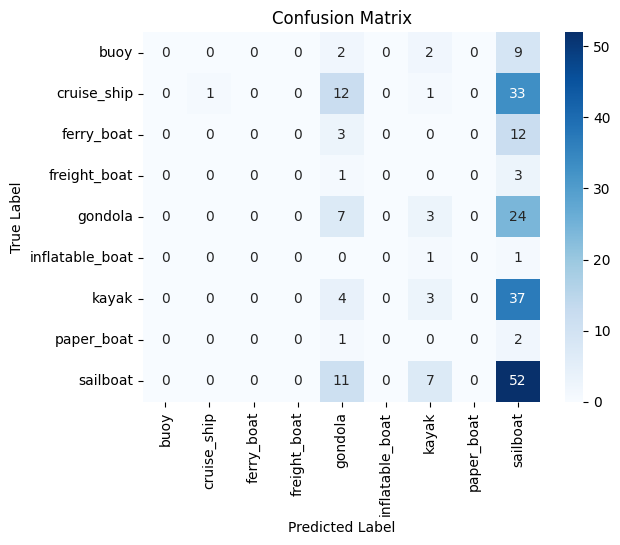

In [11]:
# Plot the confusion matrix heatmap
conf_matrix = tf.math.confusion_matrix(tf.convert_to_tensor(y_true, dtype=tf.int64), y_pred)
sns.heatmap(data=conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Lightweight model using MobileNetV2

In [12]:
# Load the image dataset and split data into 70:30 split, using seed = 1 and shuffle enabled with batch size of 32 

# training set, images rescaled to 256x256 by default
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    image_dir,
    validation_split=0.3,
    subset="training",
    seed=1,
    shuffle=True,
    batch_size=32,
    image_size=(img_width,img_height)
)

#validation set, images rescaled to 256x256 by default
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    image_dir,
    validation_split=0.3,
    subset="validation",
    seed=1,
    shuffle=True,
    batch_size=32,
    image_size=(img_width,img_height)
)

Found 1162 files belonging to 9 classes.
Using 814 files for training.
Found 1162 files belonging to 9 classes.
Using 348 files for validation.


In [13]:
# Build CNN using MobileNetV2 as the initial layer

# Use MobileNetV2 to create the base model which will be used as the first layer in the CNN
base_model = MobileNetV2(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')

# Freeze layers in MobileNetV2 so the pretrained model doesn't get its weights changed during training
base_model.trainable = False

mobile_model = Sequential([
    keras.Input(shape=(img_height, img_width, 3)),
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(9, activation='softmax')
])

mobile_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

mobile_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 8, 8, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               327936    
                                                                 
 batch_normalization (Batch  (None, 256)              

In [14]:
# Train model
epochs = 50
monitor = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
                                         
train_history = mobile_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[monitor]
)

Epoch 1/50
26/26 [==============================] - 15s 522ms/step - loss: 1.2117 - accuracy: 0.6290 - val_loss: 0.7634 - val_accuracy: 0.7902
Epoch 2/50
26/26 [==============================] - 13s 508ms/step - loss: 0.4013 - accuracy: 0.8821 - val_loss: 0.5617 - val_accuracy: 0.8420
Epoch 3/50
26/26 [==============================] - 13s 511ms/step - loss: 0.2564 - accuracy: 0.9140 - val_loss: 0.5154 - val_accuracy: 0.8506
Epoch 4/50
26/26 [==============================] - 13s 513ms/step - loss: 0.1683 - accuracy: 0.9582 - val_loss: 0.4766 - val_accuracy: 0.8592
Epoch 5/50
26/26 [==============================] - 13s 508ms/step - loss: 0.1276 - accuracy: 0.9668 - val_loss: 0.5059 - val_accuracy: 0.8477
Epoch 6/50
26/26 [==============================] - 13s 510ms/step - loss: 0.0905 - accuracy: 0.9779 - val_loss: 0.4977 - val_accuracy: 0.8563
Epoch 7/50
26/26 [==============================] - 13s 502ms/step - loss: 0.0759 - accuracy: 0.9803 - val_loss: 0.5226 - val_accuracy: 0.8621

In [15]:
# Evaluate model with test data
test_loss, test_acc = mobile_model.evaluate(val_ds)
print(f'Test Accuracy: {test_acc:.2f}')
print(f'Test Loss: {test_loss:.2f}')

11/11 [==============================] - 4s 343ms/step - loss: 0.5217 - accuracy: 0.8563
Test Accuracy: 0.86
Test Loss: 0.52


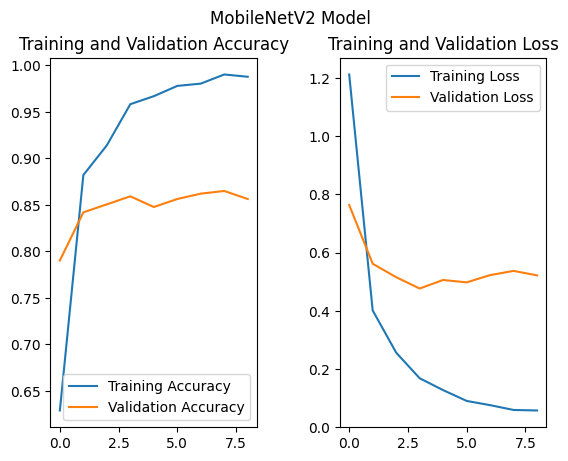

In [16]:
# Plot model training results
acc = train_history.history['accuracy']
val_acc = train_history.history['val_accuracy']

loss = train_history.history['loss']
val_loss = train_history.history['val_loss']

epochs_range = range(monitor.stopped_epoch+1)

fig, (accuracy_ax, loss_ax) = plt.subplots(1, 2)
accuracy_ax.plot(epochs_range, acc, label='Training Accuracy')
accuracy_ax.plot(epochs_range, val_acc, label='Validation Accuracy')
accuracy_ax.legend(loc='lower right')
accuracy_ax.set_title('Training and Validation Accuracy')

loss_ax.plot(epochs_range, loss, label='Training Loss')
loss_ax.plot(epochs_range, val_loss, label='Validation Loss')
loss_ax.legend(loc='upper right')
loss_ax.set_title('Training and Validation Loss')

fig.suptitle('MobileNetV2 Model')
plt.subplots_adjust(wspace=0.4)
plt.show()

#### Display confusion matrix and classification report

In [17]:
# Print classification report
y_pred_prob = mobile_model.predict(val_ds)
y_pred = tf.argmax(y_pred_prob, axis=-1)

y_true = np.concatenate([y for x, y in val_ds], axis=0)

print(classification_report(y_true, y_pred, target_names=list(class_names), zero_division=0))

11/11 [==============================] - 4s 342ms/step
                 precision    recall  f1-score   support

           buoy       0.00      0.00      0.00        14
    cruise_ship       0.12      0.12      0.12        60
     ferry_boat       0.00      0.00      0.00        18
   freight_boat       0.00      0.00      0.00         9
        gondola       0.19      0.20      0.20        55
inflatable_boat       0.00      0.00      0.00         4
          kayak       0.21      0.25      0.23        69
     paper_boat       0.00      0.00      0.00         8
       sailboat       0.32      0.34      0.33       111

       accuracy                           0.21       348
      macro avg       0.09      0.10      0.10       348
   weighted avg       0.19      0.21      0.20       348



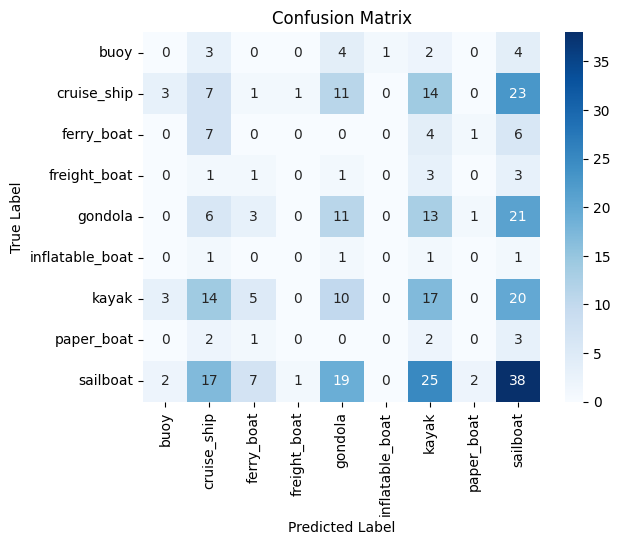

In [18]:
# Plot the confusion matrix heatmap
conf_matrix = tf.math.confusion_matrix(tf.convert_to_tensor(y_true, dtype=tf.int64), y_pred)
sns.heatmap(data=conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')

plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Observations

From the results we can see that the MobileNetV2 model shows a better performance in terms of accuracy and loss. This can also be seen in the graphs that were plotted for Train loss Vs Validation loss and Train accuracy Vs Validation accuracy. For the training loss vs validation loss, we can see that while the 2nd model has lower values for loss, there’s a big gap in the training and validation plots and it seems that the validation loss seems to be increasing after hitting the lowest it can go. These 2 factors seem to indicate overfitting and may explain the high accuracy scores that we see in the Train accuracy Vs Validation accuracy plot. Looking at the confusion matrix, we can see that the dataset used for validating the MobileNetV2 model had more varying types of boat compared to the 1st model which may have affected the results. 

To improve the performance, I would add some data augmentation layers on top of the models such as Resizing, RandomFlip, RandomRotation and RandomZoom to increase the diversity of the training set for better results and have the same test/validation data split instead of differing data for a more accurate comparison on how each model performs on the same data split with the same seed. 